In [ ]:
from pickle import load
from pickle import dump
import pandas as pd
pd.set_option("max_columns", None)
pd.set_option('max_rows', None)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [19]:
gdalinfo --help-general

NameError: name 'gdalinfo' is not defined

In [21]:
from osgeo import gdal, ogr, osr

ModuleNotFoundError: No module named 'osgeo'

In [14]:
import folium

In [15]:
m = folium.Map(location=[28.644800, 77.216721])

In [16]:
m

In [2]:
df = load(open('df_all.pkl', 'rb'))

In [3]:
df.head()

,id,total_pop,total_pop_one_race,pop_white,pop_african_american,pop_native,pop_asian,pop_islander,pop_other,total_pop_two_races,County_x,State_x,State_y,County_y,2016_total_votes,Obama,Romney,2012_total_votes,2010_land_area,Density,central_outlying,Target,state,county,poverty_total,poverty_under_18,median_household_income
0,0500000US01001,58805.0,55648.0,42160.0,11445.0,217.0,881.0,35.0,910.0,3157.0,Autauga County,Alabama,Alabama,Autauga County,24661.0,6354.0,17366.0,23909.0,594,93.0,Central,Trump,Alabama,Autauga County,6459.0,2530.0,53049.0
1,0500000US01003,231767.0,216743.0,189399.0,18217.0,1582.0,2067.0,143.0,5335.0,15024.0,Baldwin County,Alabama,Alabama,Baldwin County,94090.0,18329.0,65772.0,84988.0,1590,128.0,Central,Trump,Alabama,Baldwin County,24056.0,8357.0,47618.0
2,0500000US01005,25223.0,24523.0,11317.0,11933.0,116.0,117.0,1.0,1039.0,700.0,Barbour County,Alabama,Alabama,Barbour County,10390.0,5873.0,5539.0,11459.0,885,30.0,Central,Trump,Alabama,Barbour County,6098.0,2145.0,33074.0
3,0500000US01007,22293.0,21534.0,16555.0,4413.0,60.0,32.0,9.0,465.0,759.0,Bibb County,Alabama,Alabama,Bibb County,8748.0,2200.0,6131.0,8391.0,623,36.0,Outlying,Trump,Alabama,Bibb County,4316.0,1448.0,35472.0
4,0500000US01009,59134.0,55478.0,50663.0,845.0,337.0,178.0,24.0,3431.0,3656.0,Blount County,Alabama,Alabama,Blount County,25384.0,2961.0,20741.0,23980.0,645,89.0,Outlying,Trump,Alabama,Blount County,9358.0,3356.0,42906.0


<AxesSubplot:>

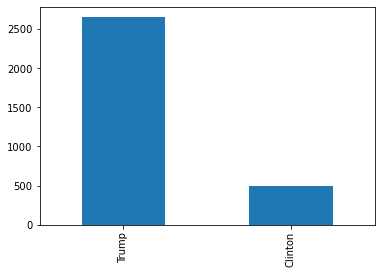

In [4]:
df.Target.value_counts().plot.bar()

<AxesSubplot:>

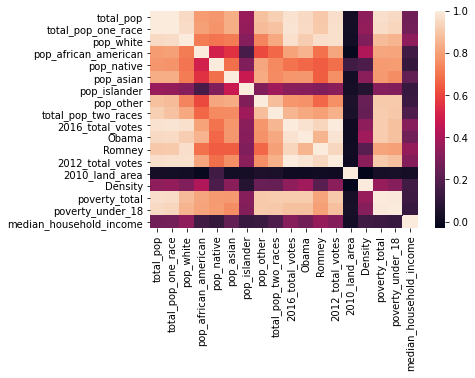

In [5]:
sns.heatmap(df.corr())

In [6]:
state_dummies = pd.get_dummies(df['State_y'], drop_first = True)
central_outlying = pd.get_dummies(df['central_outlying'], drop_first = True)

df_ohe = df.drop(['State_y', 'central_outlying'], axis = 1)

df_ohe = pd.concat([df_ohe, state_dummies, central_outlying], axis = 1)

df_ohe.Target = df_ohe.Target.map({'Trump': 0, 'Clinton': 1})

array([[<AxesSubplot:title={'center':'total_pop'}>,
        <AxesSubplot:title={'center':'total_pop_one_race'}>,
        <AxesSubplot:title={'center':'pop_white'}>,
        <AxesSubplot:title={'center':'pop_african_american'}>],
       [<AxesSubplot:title={'center':'pop_native'}>,
        <AxesSubplot:title={'center':'pop_asian'}>,
        <AxesSubplot:title={'center':'pop_islander'}>,
        <AxesSubplot:title={'center':'pop_other'}>],
       [<AxesSubplot:title={'center':'total_pop_two_races'}>,
        <AxesSubplot:title={'center':'2016_total_votes'}>,
        <AxesSubplot:title={'center':'Obama'}>,
        <AxesSubplot:title={'center':'Romney'}>],
       [<AxesSubplot:title={'center':'2012_total_votes'}>,
        <AxesSubplot:title={'center':'2010_land_area'}>,
        <AxesSubplot:title={'center':'Density'}>,
        <AxesSubplot:title={'center':'poverty_total'}>],
       [<AxesSubplot:title={'center':'poverty_under_18'}>,
        <AxesSubplot:title={'center':'median_household_in

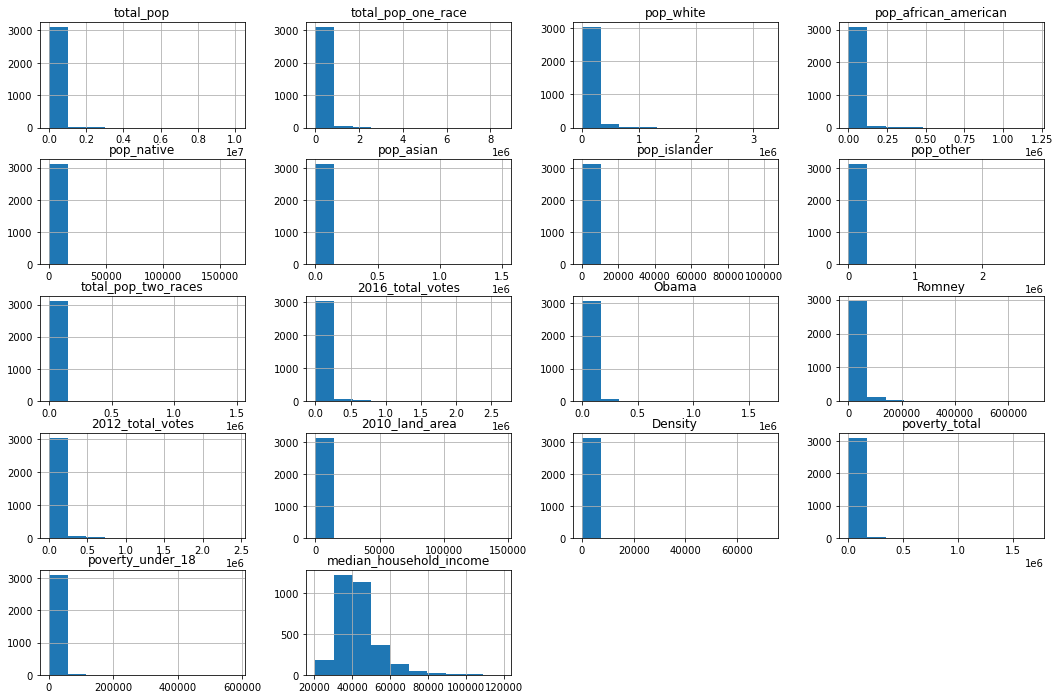

In [7]:
df.hist(figsize = (18, 12))

In [26]:
df.Density.max()

72033.0

In [32]:
df['Density_bins'] = pd.cut(df.Density, bins = [0, 100, 8000])

<AxesSubplot:xlabel='Density_bins'>

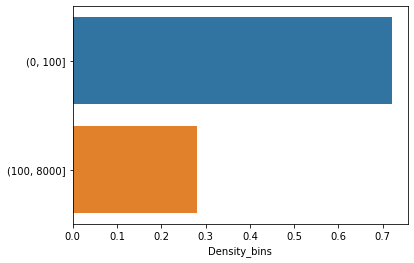

In [33]:
sns.barplot(y = df['Density_bins'].value_counts(normalize = True).index, x = df['Density_bins'].value_counts(normalize = True), orient = 'h')

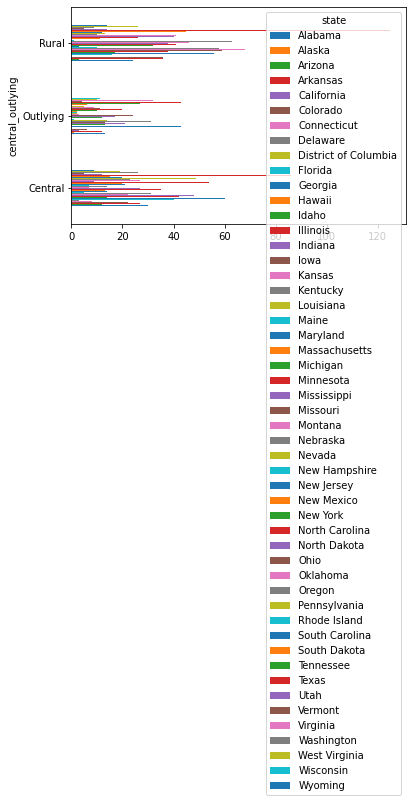

In [39]:
pd.crosstab(df.central_outlying, df.state).plot.barh();

In [50]:
!pip install GDAL

  Using cached GDAL-3.3.2.tar.gz (747 kB)


    ERROR: Command errored out with exit status 1:
     command: 'C:\Users\angie\anaconda3\envs\learn-env\python.exe' -c 'import sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\angie\\AppData\\Local\\Temp\\pip-install-bmck6btc\\gdal\\setup.py'"'"'; __file__='"'"'C:\\Users\\angie\\AppData\\Local\\Temp\\pip-install-bmck6btc\\gdal\\setup.py'"'"';f=getattr(tokenize, '"'"'open'"'"', open)(__file__);code=f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' egg_info --egg-base 'C:\Users\angie\AppData\Local\Temp\pip-pip-egg-info-fsrsxbpx'
         cwd: C:\Users\angie\AppData\Local\Temp\pip-install-bmck6btc\gdal\
    Complete output (118 lines):
    running egg_info
    creating C:\Users\angie\AppData\Local\Temp\pip-pip-egg-info-fsrsxbpx\GDAL.egg-info
    writing C:\Users\angie\AppData\Local\Temp\pip-pip-egg-info-fsrsxbpx\GDAL.egg-info\PKG-INFO
    writing dependency_links to C:\Users\angie\AppData\Local\Temp\pip-pip-egg-info-fsrsxbpx\

In [48]:
import geopandas as gpd

ModuleNotFoundError: No module named 'geopandas'

In [46]:
gdf = gpd.read_file('../counties_map.shp')


NameError: name 'gpd' is not defined